# 0.) Import the US Perminent Visas using zip extractor

In [42]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


# 1.) US perm Visas csv from cycle using zip extractor


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [24]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [5]:
df_select = df[["class_of_admission", "case_status"]]

# 3.) Clean your data for a decision tree


In [34]:
X = pd.get_dummies(df_select, "class_of_admission")
y = pd.get_dummies(df_select, "case_status")

# 4.) Fit and plot a decision tree of depth 3


In [7]:
from sklearn import tree

In [22]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X, y)

[Text(0.6666666666666666, 0.875, 'class_of_admission_Certified <= 0.5\ngini = 0.599\nsamples = 374362\nvalue = [181933, 148586, 25649, 18194]'),
 Text(0.5, 0.625, 'class_of_admission_Certified-Expired <= 0.5\ngini = 0.377\nsamples = 192429\nvalue = [0, 148586, 25649, 18194]'),
 Text(0.3333333333333333, 0.375, 'class_of_admission_Withdrawn <= 0.5\ngini = 0.486\nsamples = 43843\nvalue = [0, 0, 25649, 18194]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 25649\nvalue = [0, 0, 25649, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 18194\nvalue = [0, 0, 0, 18194]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 148586\nvalue = [0, 148586, 0, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 181933\nvalue = [181933, 0, 0, 0]')]

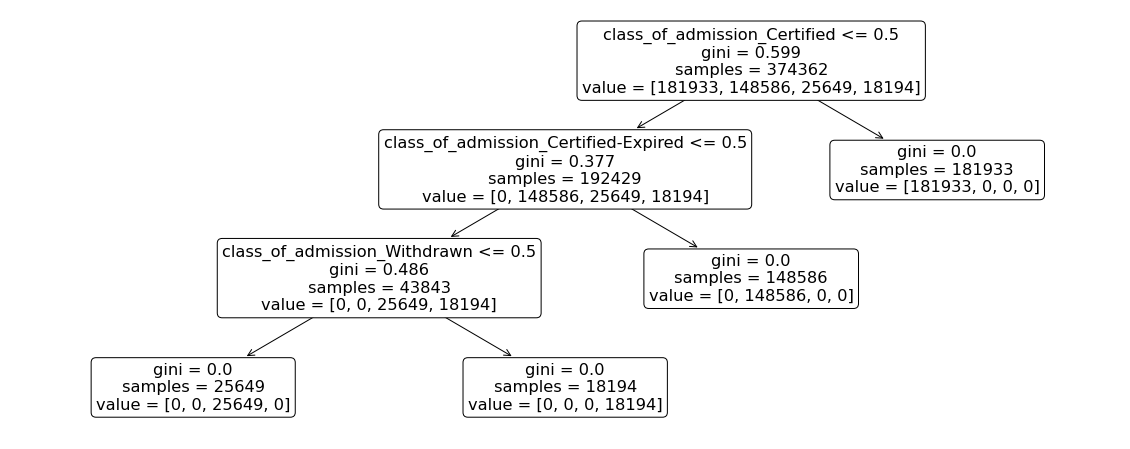

In [23]:
plt.figure(figsize = (20, 8))
tree.plot_tree(clf, max_depth = 3, rounded = True, feature_names = X.columns)

# 5.) Write your interpretation of the largest (by sample size) leaf node


In [ ]:
#the largest leaf node is class_of_admission_Certified no larger than 0.5 and class_of_admission_Certified-Expired no larger than 0.5 and class_of_admission_Withfrawn no larger than 0.5.

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [46]:
outputs = []

max_depths = [1, 2, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(y_test)
  accuracy = accuracy_score(y_test, y_pred)
  outputs.append(accuracy)
best_depths = np.argmax(outputs) + 1
print(best_depths)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- case_status_A-3
- case_status_A1/A2
- case_status_AOS
- case_status_AOS/H-1B
- case_status_B-1
- ...
Feature names seen at fit time, yet now missing:
- class_of_admission_A-3
- class_of_admission_A1/A2
- class_of_admission_AOS
- class_of_admission_AOS/H-1B
- class_of_admission_B-1
- ...

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- case_status_A-3
- case_status_A1/A2
- case_status_AOS
- case_status_AOS/H-1B
- case_status_B-1
- ...
Feature names seen at fit time, yet now missing:
- class_of_admission_A-3
- class_of_admission_A1/A2
- class_of_admission_

3


In [38]:
y_test

,case_status_A-3,case_status_A1/A2,case_status_AOS,case_status_AOS/H-1B,case_status_B-1,case_status_B-2,case_status_C-1,case_status_C-3,case_status_D-1,case_status_E-1,...,case_status_TN,case_status_TPS,case_status_U-1,case_status_V-2,case_status_VWB,case_status_VWT,case_status_Certified,case_status_Certified-Expired,case_status_Denied,case_status_Withdrawn
63403,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
207456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
22328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
301944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
91944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
135777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
